# WeatherPY

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys1 import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

## Perform API Calls

In [5]:
# List of Saved Variables

url = "http://api.openweathermap.org/data/2.5/weather?"
city_dict = {}

for x in range(len(cities)):
    try:
        city = cities[x]
        query_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q=" + city
        response = requests.get(query_url).json()
    
        city_name = response['name']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        max_temp = response['main']['temp_max']
        humd = response['main']['humidity']
        cloud = response['clouds']['all']
        wind = response['wind']['speed']
        country = response['sys']['country']
        date = response['dt']

        city_dict[x] ={'City':city_name,
                        'Lat':lat,
                        'Lng':lng,
                        'Max Temp':max_temp,
                        'Humidity':humd,
                        'Cloudiness':cloud,
                        'Wind Speed':wind,
                        'Country': country,
                        'Date': date
                       }
        
        print('Processing Record '+str(x)+' of '+str(len(cities))+' | '+city)
    except:
        print('City not found. Skipping...')
        
print('-------------------------------')
print('Data Retrieval Complete')
print('-------------------------------')

Processing Record 0 of 621 | caibarien
Processing Record 1 of 621 | draguignan
Processing Record 2 of 621 | mitchell
Processing Record 3 of 621 | khatanga
Processing Record 4 of 621 | laguna
Processing Record 5 of 621 | kapaa
Processing Record 6 of 621 | victoria
Processing Record 7 of 621 | dikson
Processing Record 8 of 621 | itarema
Processing Record 9 of 621 | puerto ayora
Processing Record 10 of 621 | flinders
Processing Record 11 of 621 | bluff
Processing Record 12 of 621 | cherskiy
Processing Record 13 of 621 | norman wells
Processing Record 14 of 621 | busselton
Processing Record 15 of 621 | ushuaia
Processing Record 16 of 621 | zhuanghe
Processing Record 17 of 621 | lavrentiya
Processing Record 18 of 621 | kaitangata
Processing Record 19 of 621 | chokurdakh
Processing Record 20 of 621 | de-kastri
Processing Record 21 of 621 | akyab
Processing Record 22 of 621 | son la
Processing Record 23 of 621 | ostersund
Processing Record 24 of 621 | zeya
Processing Record 25 of 621 | elat
P

Processing Record 209 of 621 | alekseyevsk
Processing Record 210 of 621 | almeria
Processing Record 211 of 621 | huron
Processing Record 212 of 621 | oranjestad
Processing Record 213 of 621 | kyra
Processing Record 214 of 621 | sao felix do xingu
Processing Record 215 of 621 | tahe
Processing Record 216 of 621 | anloga
Processing Record 217 of 621 | kannangad
Processing Record 218 of 621 | tuktoyaktuk
Processing Record 219 of 621 | leningradskiy
Processing Record 220 of 621 | emirdag
City not found. Skipping...
Processing Record 222 of 621 | lasa
Processing Record 223 of 621 | arraial do cabo
Processing Record 224 of 621 | buraydah
Processing Record 225 of 621 | burnie
Processing Record 226 of 621 | port elizabeth
Processing Record 227 of 621 | dothan
Processing Record 228 of 621 | vestmannaeyjar
Processing Record 229 of 621 | nioaque
Processing Record 230 of 621 | chapais
Processing Record 231 of 621 | goderich
Processing Record 232 of 621 | fairbanks
Processing Record 233 of 621 | zh

City not found. Skipping...
Processing Record 420 of 621 | moussoro
City not found. Skipping...
City not found. Skipping...
Processing Record 423 of 621 | wajima
Processing Record 424 of 621 | srednekolymsk
Processing Record 425 of 621 | praia
Processing Record 426 of 621 | chizhou
Processing Record 427 of 621 | cockburn town
City not found. Skipping...
Processing Record 429 of 621 | ballina
City not found. Skipping...
Processing Record 431 of 621 | moncton
Processing Record 432 of 621 | genoa
Processing Record 433 of 621 | port pirie
Processing Record 434 of 621 | ketchikan
Processing Record 435 of 621 | brownsville
Processing Record 436 of 621 | nishihara
City not found. Skipping...
Processing Record 438 of 621 | chor
Processing Record 439 of 621 | koster
Processing Record 440 of 621 | taltal
Processing Record 441 of 621 | durazno
Processing Record 442 of 621 | northam
Processing Record 443 of 621 | douentza
Processing Record 444 of 621 | port hardy
Processing Record 445 of 621 | fay

## Convert Raw Data To DataFrame

In [6]:
city_df = pd.DataFrame(city_dict)
city_df = city_df.transpose()
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Caibarién,22.5206,-79.4669,84.67,69,92,4.38,CU,1635012157
1,Draguignan,43.5333,6.4667,62.8,79,1,0,FR,1635012157
2,Mitchell,43.7094,-98.0298,50.11,60,100,15.99,US,1635012037
3,Khatanga,71.9667,102.5,10.92,92,100,17.07,RU,1635012158
4,Laguna,38.421,-121.4238,64.11,77,75,4,US,1635012158


## Write to CSV File

In [7]:
city_df.to_csv('City_Weather_Data.csv',index=False,header=True)
print('Process Complete: File Saved as CSV')

Process Complete: File Saved as CSV


## Inspect The Data and Remove the Cities Where The Humidity > 100%

In [8]:
city_df.describe()

# Highest Value for Humidity is 87%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,572,572.0000,572.0000,572.00,572,572,572.00,572,572
unique,571,570.0000,571.0000,524.00,93,93,370.00,119,248
top,Mahon,39.8885,4.2658,80.62,84,100,1.01,RU,1635012249
freq,2,2.0000,2.0000,4.00,19,94,17.00,72,5


In [33]:
test_df = city_df[city_df['Humidity']>100]
print(test_df)

# There are no rows with humidity over 100%, therefore no need to remove any rows

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


## Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels. Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

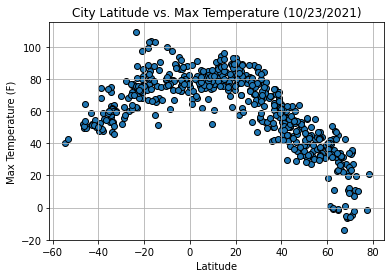

In [34]:
x = city_df['Lat']
y = city_df['Max Temp']

plt.scatter(x,y,edgecolors='k')
plt.title('City Latitude vs. Max Temperature (10/23/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

## Latitude vs. Humidity Plot

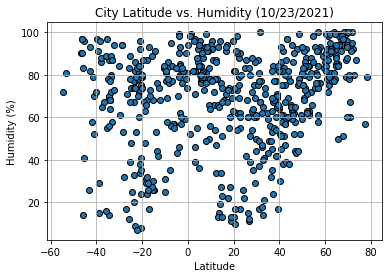

In [35]:
x = city_df['Lat']
y = city_df['Humidity']

plt.scatter(x,y,edgecolors='k')
plt.title('City Latitude vs. Humidity (10/23/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

## Latitude vs. Cloudiness Plot

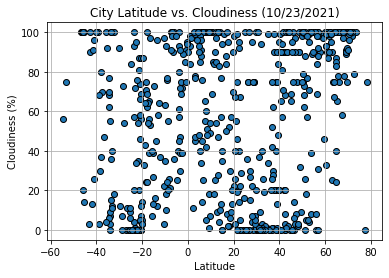

In [36]:
x = city_df['Lat']
y = city_df['Cloudiness']

plt.scatter(x,y,edgecolors='k')
plt.title('City Latitude vs. Cloudiness (10/23/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

## Latitude vs. Wind Speed Plot

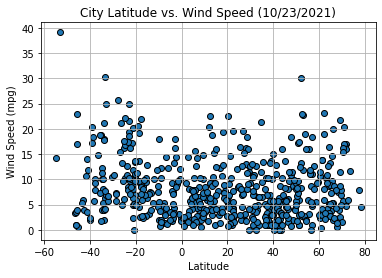

In [37]:
x = city_df['Lat']
y = city_df['Wind Speed']

plt.scatter(x,y,edgecolors='k')
plt.title('City Latitude vs. Wind Speed (10/23/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mpg)')
plt.grid(True)

## Linear Regression

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [39]:
# Split DataFrames into Northern Hemisphere and Southern Hemishpere

north_df = city_df.loc[city_df['Lat']>0]
south_df = city_df.loc[city_df['Lat']<=0]

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

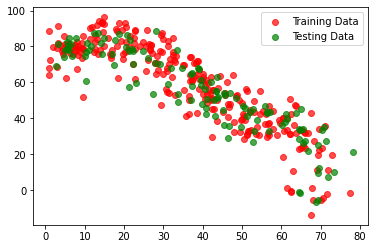

In [40]:
# Linear Regression Using SKLearn

#1. Determine X & y

x = north_df['Lat'].values
y = north_df['Max Temp'].values

#2. Split the Dataset in Training Set and Test Set

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

# Visualize Data Split

plt.scatter(x_train,y_train, label='Training Data', color='r',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
plt.legend()


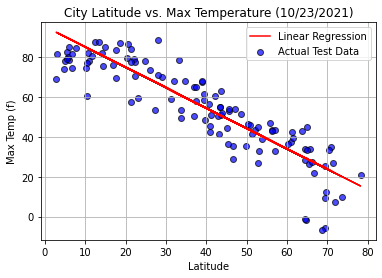

The Overall Accuracry of the Model is: 75.30%
The R^2 Value of the Linear Regression Model is: 0.7917202510933957
The Linear Equation of the Regression is: Y=-1.02X + 95.19


In [41]:
#3. Train the Model on the Training Set

LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

# Use Model to Predict on Test Data

prediction = LR.predict(x_test.reshape(-1,1))

# Plot Prediction Line Against Actual Test Data

plt.plot(x_test, prediction, label = 'Linear Regression',color='r')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='b',alpha=.7,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Max Temperature (10/23/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (f)')
plt.grid(True)
plt.show()

# Evaluate the Model
scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('The Overall Accuracry of the Model is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value of the Linear Regression Model is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))


In [42]:
# Prediction Based On Model

test_lat = 42
print('The Predicted Max Temp of Lat: '+str(test_lat)+' is: '+str(LR.predict(np.array([[test_lat]]))[0]))

The Predicted Max Temp of Lat: 42 is: 52.320371935524


## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

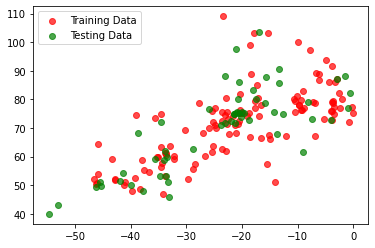

In [43]:
# Linear Regression Using SKLearn

#1. Determine X & y

x = south_df['Lat'].values
y = south_df['Max Temp'].values

#2. Split the Dataset in Training Set and Test Set

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

# Visualize Data Split

plt.scatter(x_train,y_train, label='Training Data', color='r',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
plt.legend()

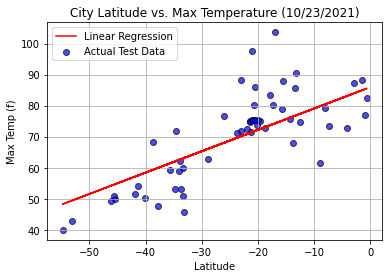

The Overall Accuracry of the Model is: 47.29%
The R^2 Value of the Linear Regression Model is: 0.5812261374934071
The Linear Equation of the Regression is: Y=0.69X + 85.94


In [44]:
#3. Train the Model on the Training Set

LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

# Use Model to Predict on Test Data

prediction = LR.predict(x_test.reshape(-1,1))

# Plot Prediction Line Against Actual Test Data

plt.plot(x_test, prediction, label = 'Linear Regression',color='r')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='b',alpha=.7,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Max Temperature (10/23/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (f)')
plt.grid(True)
plt.show()

# Evaluate the Model
scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('The Overall Accuracry of the Model is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value of the Linear Regression Model is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))


## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

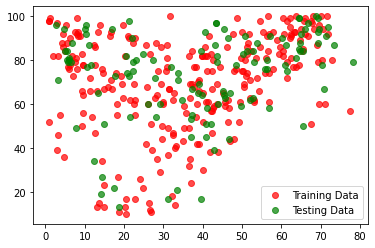

In [45]:
# Linear Regression Using SKLearn

#1. Determine X & y

x = north_df['Lat'].values
y = north_df['Humidity'].values

#2. Split the Dataset in Training Set and Test Set

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

# Visualize Data Split

plt.scatter(x_train,y_train, label='Training Data', color='r',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
plt.legend()

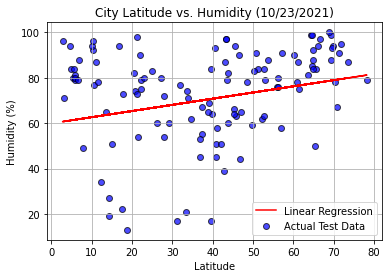

The Overall Accuracry of the Model is: 6.09%
The R^2 Value of the Linear Regression Model is: 0.03179346739258371
The Linear Equation of the Regression is: Y=0.27X + 59.90


In [46]:
#3. Train the Model on the Training Set

LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

# Use Model to Predict on Test Data

prediction = LR.predict(x_test.reshape(-1,1))

# Plot Prediction Line Against Actual Test Data

plt.plot(x_test, prediction, label = 'Linear Regression',color='r')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='b',alpha=.7,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Humidity (10/23/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Evaluate the Model
scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('The Overall Accuracry of the Model is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value of the Linear Regression Model is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

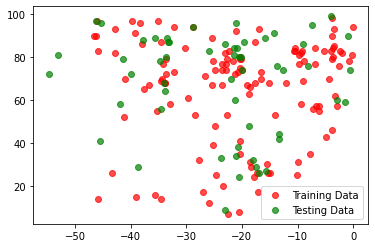

In [47]:
# Linear Regression Using SKLearn

#1. Determine X & y

x = south_df['Lat'].values
y = south_df['Humidity'].values

#2. Split the Dataset in Training Set and Test Set

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

# Visualize Data Split

plt.scatter(x_train,y_train, label='Training Data', color='r',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
plt.legend()

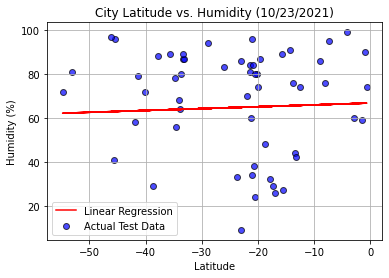

The Overall Accuracry of the Model is: 0.20%
The R^2 Value of the Linear Regression Model is: -0.033503361810540255
The Linear Equation of the Regression is: Y=0.08X + 66.77


In [48]:
#3. Train the Model on the Training Set

LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

# Use Model to Predict on Test Data

prediction = LR.predict(x_test.reshape(-1,1))

# Plot Prediction Line Against Actual Test Data

plt.plot(x_test, prediction, label = 'Linear Regression',color='r')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='b',alpha=.7,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Humidity (10/23/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Evaluate the Model
scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('The Overall Accuracry of the Model is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value of the Linear Regression Model is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

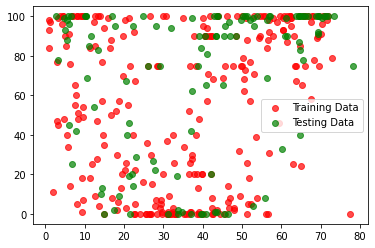

In [49]:
# Linear Regression Using SKLearn

#1. Determine X & y

x = north_df['Lat'].values
y = north_df['Cloudiness'].values

#2. Split the Dataset in Training Set and Test Set

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

# Visualize Data Split

plt.scatter(x_train,y_train, label='Training Data', color='r',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
plt.legend()

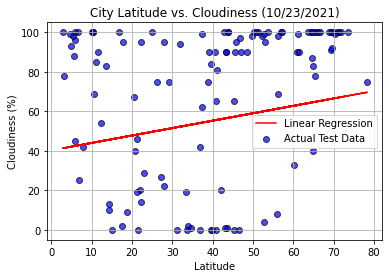

The Overall Accuracry of the Model is: 3.67%
The R^2 Value of the Linear Regression Model is: -0.0620121596112202
The Linear Equation of the Regression is: Y=0.38X + 40.25


In [50]:
#3. Train the Model on the Training Set

LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

# Use Model to Predict on Test Data

prediction = LR.predict(x_test.reshape(-1,1))

# Plot Prediction Line Against Actual Test Data

plt.plot(x_test, prediction, label = 'Linear Regression',color='r')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='b',alpha=.7,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Cloudiness (10/23/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

# Evaluate the Model
scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('The Overall Accuracry of the Model is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value of the Linear Regression Model is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

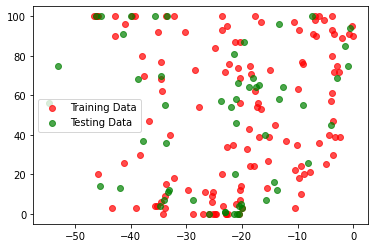

In [51]:
# Linear Regression Using SKLearn

#1. Determine X & y

x = south_df['Lat'].values
y = south_df['Cloudiness'].values

#2. Split the Dataset in Training Set and Test Set

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

# Visualize Data Split

plt.scatter(x_train,y_train, label='Training Data', color='r',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
plt.legend()

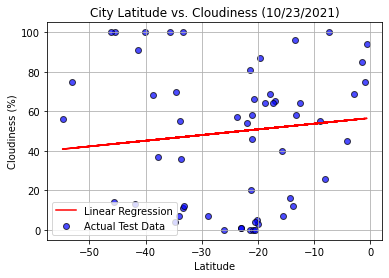

The Overall Accuracry of the Model is: 1.02%
The R^2 Value of the Linear Regression Model is: -0.018596393906669784
The Linear Equation of the Regression is: Y=0.29X + 56.61


In [52]:
#3. Train the Model on the Training Set

LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

# Use Model to Predict on Test Data

prediction = LR.predict(x_test.reshape(-1,1))

# Plot Prediction Line Against Actual Test Data

plt.plot(x_test, prediction, label = 'Linear Regression',color='r')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='b',alpha=.7,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Cloudiness (10/23/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

# Evaluate the Model
scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('The Overall Accuracry of the Model is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value of the Linear Regression Model is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

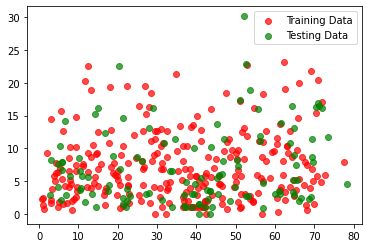

In [53]:
# Linear Regression Using SKLearn

#1. Determine X & y

x = north_df['Lat'].values
y = north_df['Wind Speed'].values

#2. Split the Dataset in Training Set and Test Set

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

# Visualize Data Split

plt.scatter(x_train,y_train, label='Training Data', color='r',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
plt.legend()

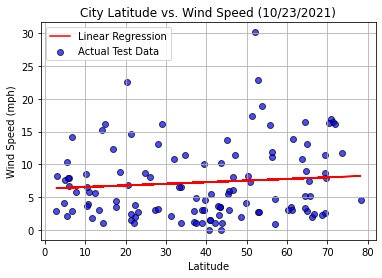

The Overall Accuracry of the Model is: 0.91%
The R^2 Value of the Linear Regression Model is: 0.01807338485115817
The Linear Equation of the Regression is: Y=0.02X + 6.30


In [54]:
#3. Train the Model on the Training Set

LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

# Use Model to Predict on Test Data

prediction = LR.predict(x_test.reshape(-1,1))

# Plot Prediction Line Against Actual Test Data

plt.plot(x_test, prediction, label = 'Linear Regression',color='r')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='b',alpha=.7,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Wind Speed (10/23/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.show()

# Evaluate the Model
scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('The Overall Accuracry of the Model is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value of the Linear Regression Model is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

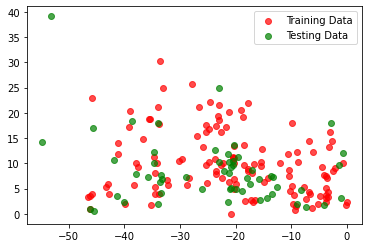

In [55]:
# Linear Regression Using SKLearn

#1. Determine X & y

x = south_df['Lat'].values
y = south_df['Wind Speed'].values

#2. Split the Dataset in Training Set and Test Set

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

# Visualize Data Split

plt.scatter(x_train,y_train, label='Training Data', color='r',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
plt.legend()

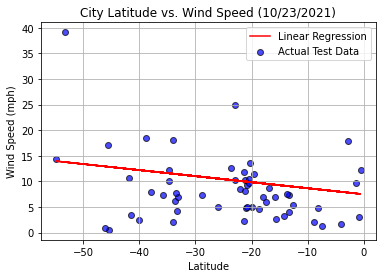

The Overall Accuracry of the Model is: 5.48%
The R^2 Value of the Linear Regression Model is: -0.001376806661330221
The Linear Equation of the Regression is: Y=-0.12X + 7.47


In [56]:
#3. Train the Model on the Training Set

LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

# Use Model to Predict on Test Data

prediction = LR.predict(x_test.reshape(-1,1))

# Plot Prediction Line Against Actual Test Data

plt.plot(x_test, prediction, label = 'Linear Regression',color='r')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='b',alpha=.7,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Wind Speed (10/23/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.show()

# Evaluate the Model
scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('The Overall Accuracry of the Model is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value of the Linear Regression Model is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))